In [124]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Description of Data Set

I am going to analyze on the Youtube trending videos of 2 months (Sep,Oct) in 2017 dataset derived from Kaggle (https://www.kaggle.com/datasnaek/youtube). 
First reading both USvideos.csv and UScomments.csv. There are few bad lines in the data set which is getting ignored with the additional flag

In [149]:
df_videos = pd.read_csv('./datasets/youtube/USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [11]:
df_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
7,_HTXMhKWqnA,iPhone X Impressions & Hands On!,Marques Brownlee,28,iPhone X|iphone x|iphone 10|iPhone X impressio...,1728614,74062,2180,15297,https://i.ytimg.com/vi/_HTXMhKWqnA/default.jpg,13.09
15,1L7JFN7tQLs,iPhone X Hands on - Everything you need to know,Jonathan Morrison,28,Apple|iPhone X|iPhone 8|iPhone X unboxing|Appl...,514972,18936,641,3817,https://i.ytimg.com/vi/1L7JFN7tQLs/default.jpg,13.09
203,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,12200526,258842,44339,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,14.09


### Q1. Find the top 10 channels trending videos tagged under iPhone based on their views. The goal is to find which channel is the best in the iPhone trending data set.

Searching DataFrame 'tags' columns which is tagged either iPhone or Apple, followed by sorting in Descending to get largest to smallest, followed by limiting to top10.
Once the DataFrame is filtered and sorted, then plotting the same by using 'plot' method of DataFrame as a bar chart with a 'y-axis' range from 1 m to 20m range.

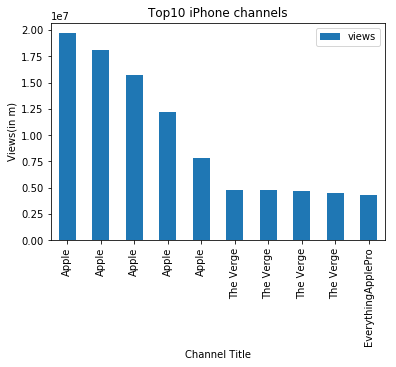

In [150]:
df_videos_top = df_videos[df_videos['tags'].str.contains('iPhone' or 'Apple')].sort_values(by='views', ascending=False).head(10)
ax = df_videos_top.plot(kind='bar',x='channel_title',y='views',title='Top10 iPhone channels')
ax.set_xlabel('Channel Title')
ax.set_ylabel('Views(in m)')

### Q2. Find a relation between the category id and how many videos getting uploaded on that category. The goal is what is the category of highest trending videos. 
Below is the mapping of category name and mapping to their numeric id.
https://gist.github.com/sujittripathy/29488b1dc9abd75bd79e62c0b3756203


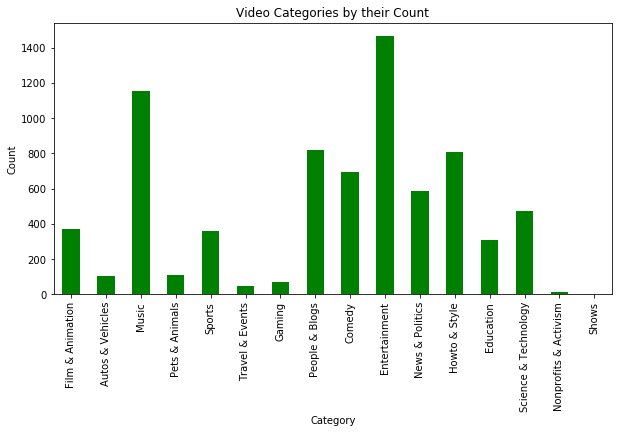

In [137]:
cat_id_mapping = {2:'Autos & Vehicles',1:'Film & Animation',
                  10:'Music',15:'Pets & Animals',17:'Sports',
                 19:'Travel & Events',20:'Gaming',22:'People & Blogs',
                 23:'Comedy',24:'Entertainment',25:'News & Politics',
                 26:'Howto & Style',27:'Education',28:'Science & Technology',
                  29:'Nonprofits & Activism',43:'Shows'}
df_videos_gb = df_videos.groupby('category_id').count()['title']
df_videos_gb = df_videos_gb.rename(cat_id_mapping)
ax = df_videos_gb.plot(kind='bar',title='Video Categories by their Count',color='green',figsize=(10,5))
ax.set_xlabel('Category')
ax.set_ylabel('Count')


### Q3. Create a single chart by showing the trends of like, dislike and comments of top 10 viewed trending videos. The goal to find what's the similarity of the top trending videos- do they have more comments? or likes? compare to one another.

### Q4. The goal is to find the number of trending videos fall in every 50k viewed count. This will give us an idea of what's the number of views on most trending videos.

In [6]:
#all columns in df_videos
df_videos.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date'],
      dtype='object')

In [7]:
df_comments = pd.read_csv('./datasets/youtube/UScomments.csv',error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/Users/sujittripathy/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
